Exploring the data

In [2]:
#import packages

import numpy as np
import math
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm  #Regression

## Use inline magic command so plots appear in the data frame
%matplotlib inline

#import data
BostonDF = pd.read_csv('C:\\Users\Owner\Documents\DataScience\BostonHousing.csv')

print(BostonDF.columns)
print(BostonDF.head)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93

1.	##Choose a variable other than CHAS and MEDV (the target, median home price).Room (RM), I choose you!

a. Compute the mean and standard deviation of the variable.

In [3]:
#Compute statistics of variable, RM
BostonDF['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

b.	Plot a histogram of the variable.

SkewtestResult(statistic=3.6165514870123805, pvalue=0.0002985539551619877)

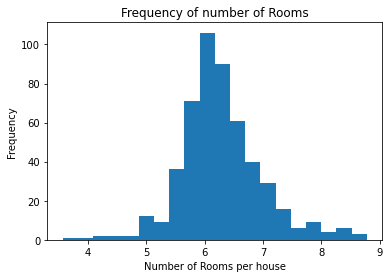

In [4]:
import matplotlib.pyplot as plt
from scipy import stats

plt.hist(BostonDF['RM'], bins = 20)
plt.title('Frequency of number of Rooms')
plt.xlabel('Number of Rooms per house')
plt.ylabel('Frequency')
skew = ss.skewtest(BostonDF.RM)
skew

c.	What is the sample correlation between your chosen variable and median home price?

0.695


(array([0.5, 1.5]), [Text(0.5, 0, 'RM'), Text(1.5, 0, 'MEDV')])

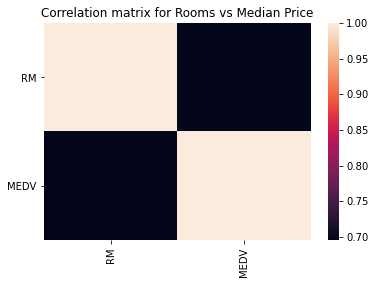

In [5]:
corr_mat = BostonDF[['RM', 'MEDV']].corr().round(3)
print(corr_mat.iloc[1,0].round(3))

#correlation matrix heatmap, cause why not?
sns.heatmap(corr_mat, vmax=1.0) 
plt.title('Correlation matrix for Rooms vs Median Price')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

d.	Perform a regression, predicting MEDV from your chosen variable.


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           2.49e-74
Time:                        18:23:29   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             9.1021      0.419     21.722      0.0

Text(0.5, 1.0, 'Relationship between RM and Price')

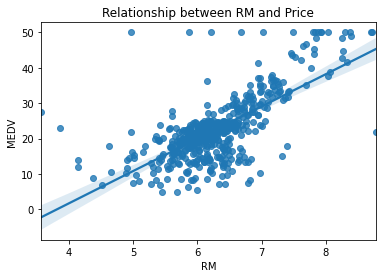

In [6]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(BostonDF.RM, prepend = False)

lm_mod = sm.OLS(BostonDF.MEDV, predictors)
res = lm_mod.fit()
print(res.summary())

#print scatter plot of RM and MEDV
sns.regplot(y="MEDV", x="RM", data=BostonDF, fit_reg = True)
plt.title("Relationship between RM and Price")

2.	You have a theory that tracts that border the Charles River (CHAS) will have higher median price (MEDV or target) than those that do not.

a.	What is the null hypothesis?

(in a statistical test) the hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error

b.	Calculate the p-value. Use the sample mean of the target as an estimate of the population mean.

In [7]:
##BostonDF.groupby(['RM','CHAS']).mean()

MEDVC = BostonDF.groupby('CHAS')['MEDV'].mean()  ##MEDV mean based on CHAS
print(MEDVC)



CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


In [8]:
from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = 28.44
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('Results of one-sample two-sided t test')
    print('Mean         = %4.3f' % loc)
    print('t-Statistic  = %4.3f' % t_stat[0])
    print('p-value      < %4.3e' % t_stat[1])
    print('On degrees of freedom = %4d' % (len(samp) - 1))
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))
    
t_one_sample(BostonDF.MEDV)  

Results of one-sample two-sided t test
Mean         = 28.440
t-Statistic  = 55.111
p-value      < 9.371e-216
On degrees of freedom =  505
Confidence Intervals for alpha =0.1
Lower =  27.938 Upper = 28.942


c.	What is the 90% confidence interval for the target (price) of tracts that border the Charles River? **Above**

d.	Assume an effect size (Cohen’s d) of 0.6. If you want 80% power, what group size is necessary?

In [9]:
from statsmodels.stats.power import tt_ind_solve_power
tt_ind_solve_power(effect_size=.6, nobs1 = None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')

44.5857902590805

3.	Imagine you are the city planner of Boston and can add various new features to each census tract, such as a park. Be creative with your new “features” – we use the term loosely. You can assume that none of the tracts contained your features previously. Design an experiment to explore the effects of these features on the media house price in census tracts. You should include an explanation of the experimental design as well as a plan of analysis, which should include a discussion of group size and power. Be sure to apply the knowledge you learned in the Data Science Research Methods courses.

The new feature I propose to add in the area would be 
<br>1)	Scooter/Bike path and scooter/bike stations

<br>Overall Experiment plan:
 1)	The Research process
>   a) Goals of research is to determine the following:
<br>       i)	If residents would like an added path and scooters and bikes
<br>       ii)	How much path to put?
<br>      iii)	How wide? Material?
<br>       iv)	Where to put path?

  b)	Clarifying questions
> <br> >  i)	Quantify survey questions on Likert Scale
<br>       ii)	Ex: How often would you use path (1-5)? How far your commute is?

c)	Psychology of data
> <br>        i)	Phrase and ask questions to reduce bias 
  <br>     ii)	Ex: leading questions, double barrel, Jargon, double negatives, loaded questions

<br>  2)	Planning for analysis
    a)	Sample vs population
>        i)	Determine sample size for 80% power


In [1]:
#from statsmodels.stats.power import tt_ind_solve_power
#tt_ind_solve_power(effect_size=.6, nobs1 = None, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')


    b)	Discrediting null hypothesis
        i)	Null hypothesis would be that adding the path, scooters, and bikes will not raise median price
    ii)	Will test by adding the feature “distance to path/scooter on next census or path use

3)	Correlation and experimental design
    a)	Correlate with MEDV
